In [1]:
import pandas as pd

dados = pd.read_csv('drive/MyDrive/Dados/Invistico_Airline.csv')
dados.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [2]:
dados.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [3]:
dados.dtypes

,0
satisfaction,object
Gender,object
Customer Type,object
Age,int64
Type of Travel,object
Class,object
Flight Distance,int64
Seat comfort,int64
Departure/Arrival time convenient,int64
Food and drink,int64


In [4]:
dados['satisfaction'].unique()

array(['satisfied', 'dissatisfied'], dtype=object)

In [5]:
dados['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [6]:
dados['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [7]:
dados['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

# Transformando valores das colunas em dados númericos

In [8]:
dados['satisfaction'] = dados['satisfaction'].map({'satisfied': 1, 'dissatisfied': 0}).astype('int64')
dados['Gender'] = dados['Gender'].map({'Female': 1, 'Male': 0}).astype('int64')
dados['Customer Type'] = dados['Customer Type'].map({'Loyal Customer': 1, 'disloyal Customer': 0}).astype('int64')
dados['Type of Travel'] = dados['Type of Travel'].map({'Business travel': 1, 'Personal Travel': 0}).astype('int64')
dados['Class'] = dados['Class'].map({'Business': 1, 'Eco Plus': 2, 'Eco': 0}).astype('int64')

In [9]:
dados['Arrival Delay in Minutes'].fillna(0, inplace=True)
dados['Arrival Delay in Minutes'] = dados['Arrival Delay in Minutes'].astype('int64')

<ipython-input-9-fbafd25eddac>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados['Arrival Delay in Minutes'].fillna(0, inplace=True)


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

def f(x):
  return int(x)

f2 = np.vectorize(f)

x = dados.drop(['satisfaction', 'Customer Type'], axis=1)
y = dados['satisfaction']

modelo = LinearRegression()
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, random_state=43)
modelo.fit(treino_x, treino_y)
prev = modelo.predict(teste_x)

print(f"A acurácia do modelo LinearRegression é: {((accuracy_score(teste_y, f2(prev.round())))*100):.2f}%")

A acurácia do modelo LinearRegression é: 81.76%


In [11]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

def f(x):
  return int(x)

f2 = np.vectorize(f)

x = dados.drop(['satisfaction', 'Customer Type'], axis=1)
y = dados['satisfaction']

modelo = svm.LinearSVC()
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, random_state=43)
modelo.fit(treino_x, treino_y)
prev = modelo.predict(teste_x)

print(f"A acurácia do modelo LinearSVC é: {((accuracy_score(teste_y, f2(prev.round())))*100):.2f}%")

A acurácia do modelo LinearSVC é: 81.74%


In [12]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

def f(x):
  return int(x)

f2 = np.vectorize(f)

x = dados.drop(['satisfaction', 'Customer Type'], axis=1)
y = dados['satisfaction']

modelo = SGDClassifier(loss="epsilon_insensitive", penalty="l2", max_iter=5)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, random_state=43)
modelo.fit(treino_x, treino_y)
prev = modelo.predict(teste_x)

print(f"A acurácia do modelo SGDClassifier é: {((accuracy_score(teste_y, f2(prev.round())))*100):.2f}%")

A acurácia do modelo SGDClassifier é: 45.33%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [13]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

def f(x):
  return int(x)

f2 = np.vectorize(f)

x = dados.drop(['satisfaction', 'Customer Type'], axis=1)
y = dados['satisfaction']

modelo = DummyClassifier(strategy='most_frequent')
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, random_state=43)
modelo.fit(treino_x, treino_y)
prev = modelo.predict(teste_x)

print(f"A acurácia do modelo DummyClassifier é: {((accuracy_score(teste_y, f2(prev.round())))*100):.2f}%")

A acurácia do modelo DummyClassifier é: 54.68%


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

def f(x):
  return int(x)

f2 = np.vectorize(f)

x = dados.drop(['satisfaction', 'Customer Type'], axis=1)
y = dados['satisfaction']

modelo = DecisionTreeClassifier(max_depth=3)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, random_state=43)
modelo.fit(treino_x, treino_y)
prev = modelo.predict(teste_x)

print(f"A acurácia do modelo DecisionTreeClassifier é: {((accuracy_score(teste_y, f2(prev.round())))*100):.2f}%")

A acurácia do modelo DecisionTreeClassifier é: 85.50%


In [15]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

def f(x):
  return int(x)

f2 = np.vectorize(f)

x = dados.drop(['satisfaction', 'Customer Type'], axis=1)
y = dados['satisfaction']

modelo = ExtraTreeClassifier(max_depth=18)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, random_state=43)
modelo.fit(treino_x, treino_y)
prev = modelo.predict(teste_x)

print(f"A acurácia do modelo ExtraTreeClassifier é: {((accuracy_score(teste_y, f2(prev.round())))*100):.2f}%")

A acurácia do modelo ExtraTreeClassifier é: 90.67%


In [29]:
from sklearn.tree import ExtraTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

def f(x):
  return int(x)

f2 = np.vectorize(f)

x = dados.drop(['satisfaction', 'Customer Type'], axis=1)
y = dados['satisfaction']

modelo = ExtraTreeRegressor(max_depth=3) # Tinha colocado anteriomente 18 a Acurácia foi acima de 90%, porém a árvore de decisão fica enorme e fica impossível de ler

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, random_state=43)
modelo.fit(treino_x, treino_y)
prev = modelo.predict(teste_x)

print(f"A acurácia do modelo ExtraTreeRegressor é: {((accuracy_score(teste_y, f2(prev.round())))*100):.2f}%")

A acurácia do modelo ExtraTreeRegressor é: 79.84%


# Árvore de Decisão


#### Utlizei o modelo de DecisionTreeClassifier, testei outros apenas para ver qual o melhor modelo para esse caso.

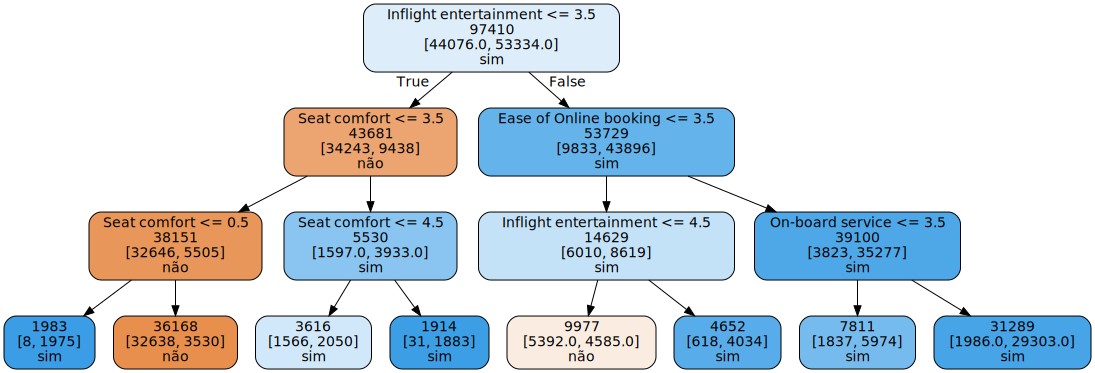

In [50]:
from sklearn.tree import export_graphviz
import graphviz

arvore = export_graphviz(modelo, max_depth=18, feature_names=x.columns, label='none', filled=True, class_names=['não', 'sim'],
                         leaves_parallel=False, impurity=False, node_ids=False, proportion=False, rotate=False, rounded=True, special_characters=False, precision=3, fontname='radluka')

arvore_decisao = graphviz.Source(arvore)
arvore_decisao

In [18]:
dado_prever = [[0, 21, 0, 1, 2000, 0, 0, 1, 4, 4, 4, 4, 4, 4, 4, 1, 5, 2, 2, 200, 0]]
previsao = modelo.predict(dado_prever)
previsao.round()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but ExtraTreeRegressor was fitted with feature names
  warnings.warn(


array([1.])

# Melhorando a precisão do Modelo Utilizando StandardScaler

#### Aqui nesse código abaixo utilizei um pipeline para não precisar fazer manualmente as transformações.

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

def f(x):
  return int(x)

f2 = np.vectorize(f)

x = dados.drop(['satisfaction', 'Customer Type'], axis=1)
y = dados['satisfaction']

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, random_state=43)

modelo = Pipeline([
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(max_depth=3))
])

modelo.fit(treino_x, treino_y)
prev = modelo.predict(teste_x)

print(f"A acurácia do modelo DecisionTreeClassifier é: {((accuracy_score(teste_y, f2(prev.round())))*100):.2f}%")

A acurácia do modelo DecisionTreeClassifier é: 85.50%
